In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import scipy
from scipy import signal

In [2]:
PATH = "E:\\Repo Scripts\\Level Set Codes\\Image\\1.jpg"
img = cv2.imread(PATH,0).astype(np.float32)
# plt.imshow(img,cmap='gray')

# C-V

In [3]:
def Heaviside(phi:np.ndarray,epsilon:int=1)->np.ndarray:
    H = 0.5*(1+ (2/np.pi)*np.arctan(phi/epsilon))
    return H
def Dirac(phi:np.ndarray,epsilon:int=1)->np.ndarray:
    Delta_h=(epsilon/np.pi)/(epsilon**2+ phi**2)
    return Delta_h
def NeumannBoundCond(g: np.ndarray) -> np.ndarray:
    #Make a function satisfy Neumann boundary condition
    nrow,ncol = g.shape
    g[1: nrow][1: ncol] = g[3: nrow-2][3: ncol-2]
    g[1: nrow][2: -1] = g[3:nrow-2][2:-1]
    g[2: -1][1: ncol] = g[2: -1][3: ncol-2]
    return g
def Calculate_c(Img:np.ndarray,H_phi:np.ndarray)->float:
    numer_1 = np.sum(H_phi*Img) 
    denom_1 = np.sum(H_phi)
    C1 = numer_1/denom_1

    numer_2 = np.sum((1-H_phi)*Img)
    denom_2 = np.sum(1-H_phi)
    C2 = numer_2/denom_2
    return C1,C2

In [4]:
def evolveLSF(I:np.ndarray,phi:np.ndarray,epoch:int,epsilon:float = 1,timestep:float = 0.1,lambda_1:float = 1., lambda_2: float = 1,nu:float = 1)->np.ndarray:
    for i in range(epoch):
        # phi = NeumannBoundCond(phi)
        dirac_phi = Dirac(phi)
        H_phi = Heaviside(phi, epsilon)
        # kappa = CURVATURE(phi,'cc')
        C1,C2 = Calculate_c(I,H_phi)
        # updating the phi function
        phi = phi+timestep*(dirac_phi*(nu-lambda_1*(I-C1)**2+lambda_2*(I-C2)**2))
    return phi


In [5]:
phi0 = np.ones((img.shape[0],img.shape[1]))
# phi0[int(3*img.shape[0]/10):int(7*img.shape[0]/10),int(3*img.shape[1]/10):int(7*img.shape[1]/10)] = -1
phi0[30:70,50:90] = -1
# plt.contour(phi0)

In [6]:
epsilon = 1.
lambda1 = 1. #inside
lambda2 = 1. #outside
mu = 1.  #length
nu = 0.  #area
epoch = 10

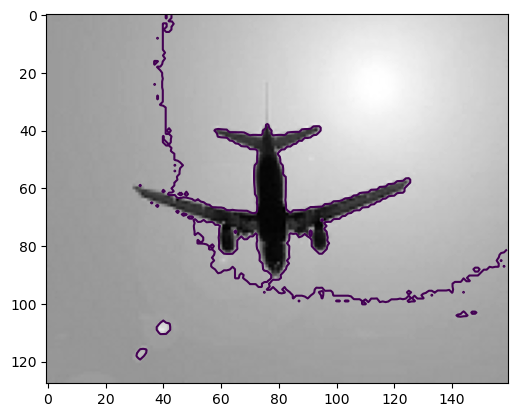

In [7]:
phi = evolveLSF(img,phi0,epoch)
plt.imshow(img,cmap='gray')
plt.contour(phi,[-1e-10,1e+10])
# plt.contour(np.flip(phi,0),[-1e-10,1e+10])

# RSF

In [16]:
def gaussian(x,mu,sigma):
    f_x = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-np.power(x-mu, 2.)/(2*np.power(sigma,2.)))
    return(f_x)

In [8]:
def gaussian_kernel(size:int=81,sigma:float=20.)->np.ndarray:
    G = np.multiply(cv2.getGaussianKernel(size, sigma), (cv2.getGaussianKernel(size, sigma)).T)
    return G
def get_curvature(phi):
    
def rsf_func(phi:np.ndarray,img:np.ndarray,k_g:np.ndarray,k_img:np.ndarray,k_one:np.ndarray,
             mu:float,nu:float,timestep:int,lambda1:float,lambda2:float,epsilon:float,epoch:int)->np.ndarray:
    curv = get_curvature(phi)
    dirac_phi = Dirac(phi,epsilon)
    f1,f2 = calculate_f(phi,img,k_img,k_one,k_g)
    


In [41]:
length = 81
sigma = 1.

In [10]:
k_g = gaussian_kernel(length,sigma)
k_img = scipy.signal.convolve(img,k_g,mode='same')
k_one = scipy.signal.convolve(np.ones(img.shape),k_g,mode='same')

In [11]:
def calculate_f(Img: np.ndarray,phi: np.ndarray, sigma: float) -> np.ndarray:
    

SyntaxError: unexpected EOF while parsing (83995239.py, line 2)